## Assignment - 1
### Name : Limalka Sadith
### Index No : 190538N

In [86]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

256


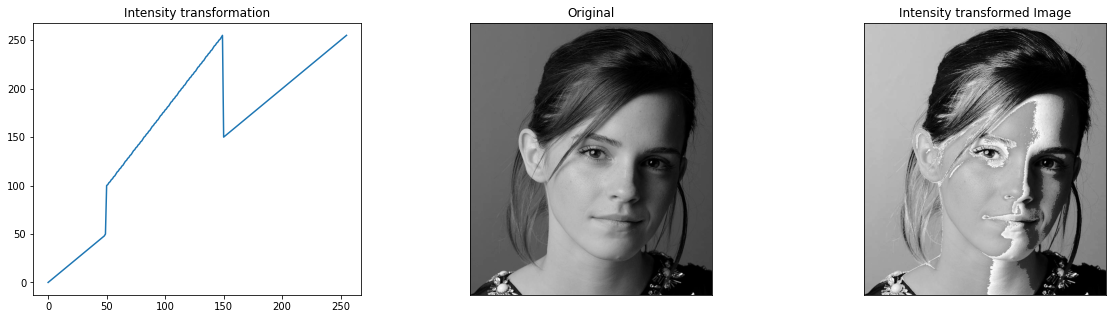

In [88]:
#Q1
t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3),axis = 0).astype(np.uint8)
print(len(t))

img = cv.imread('emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None, "Image Not Found!!"

new_img = cv.LUT(img,t)

fig,ax = plt.subplots(1,3,figsize = [20,5])
ax[0].plot(t)
ax[1].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)
ax[0].set_title('Intensity transformation')
ax[1].set_title('Original')
ax[2].set_title('Intensity transformed Image')
ax[2].imshow(new_img,cmap='gray',vmin=0,vmax=255)
ax[2].axes.xaxis.set_visible(False)
ax[2].axes.yaxis.set_visible(False)
plt.show()

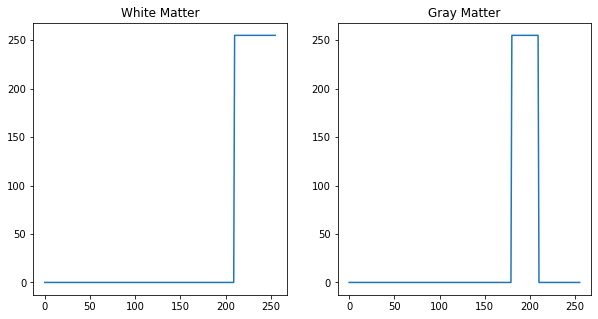

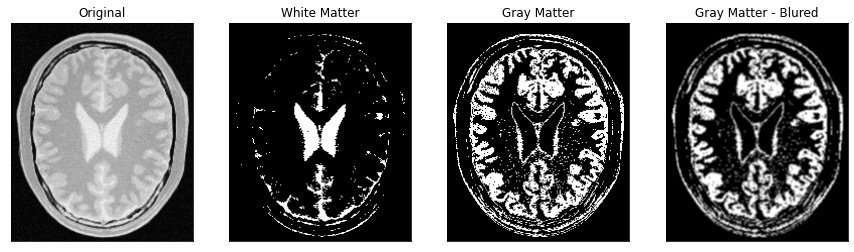

In [29]:
#Q2
x = 210
t1 = np.linspace(0,0,x)
t2 = np.linspace(255,255,256-x)

y = 180
y_size = 30
t3 = np.linspace(0,0,y)
t4 = np.linspace(255,255,y_size)
t5 = np.linspace(0,0,256-y_size-y)


t_white = np.concatenate((t1,t2),axis = 0).astype(np.uint8)
t_gray = np.concatenate((t3,t4,t5),axis = 0).astype(np.uint8)
assert len(t_white)== 256, "Transformation Incorrect"
assert len(t_gray)== 256, "Transformation Incorrect"


img = cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE).astype(np.uint8)
assert img is not None, "Image Not Found!!"

white_matter = cv.LUT(img,t_white)
gray_matter = cv.LUT(img,t_gray)
gray_matter_filtered = cv.GaussianBlur(gray_matter,(3,3),0)
# gray_matter_filtered = cv.medianBlur(gray_matter,3)


fig,ax = plt.subplots(1,2,figsize = [10,5])
ax[0].plot(t_white)
ax[1].plot(t_gray)

ax[0].set_title('White Matter')
ax[1].set_title('Gray Matter')

fig,ax = plt.subplots(1,4,figsize = [15,5])

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)

ax[1].imshow(white_matter,cmap='gray',vmin=0,vmax=255)
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)

ax[2].imshow(gray_matter,cmap='gray',vmin=0,vmax=255)
ax[2].axes.xaxis.set_visible(False)
ax[2].axes.yaxis.set_visible(False)

ax[3].imshow(gray_matter_filtered,cmap='gray',vmin=0,vmax=255)
ax[3].axes.xaxis.set_visible(False)
ax[3].axes.yaxis.set_visible(False)

ax[0].set_title('Original')
ax[1].set_title('White Matter')
ax[2].set_title('Gray Matter')
ax[3].set_title('Gray Matter - Blured')
plt.show()

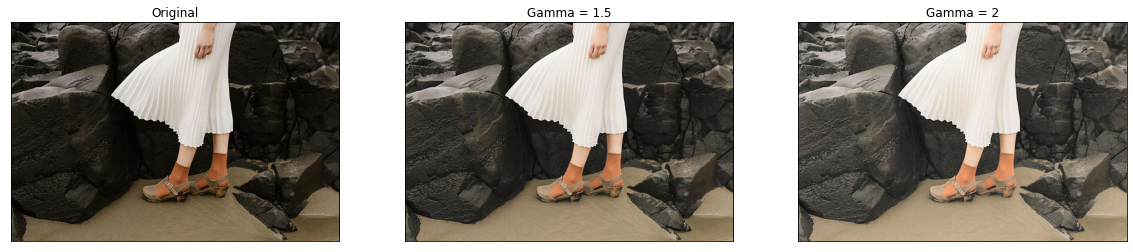

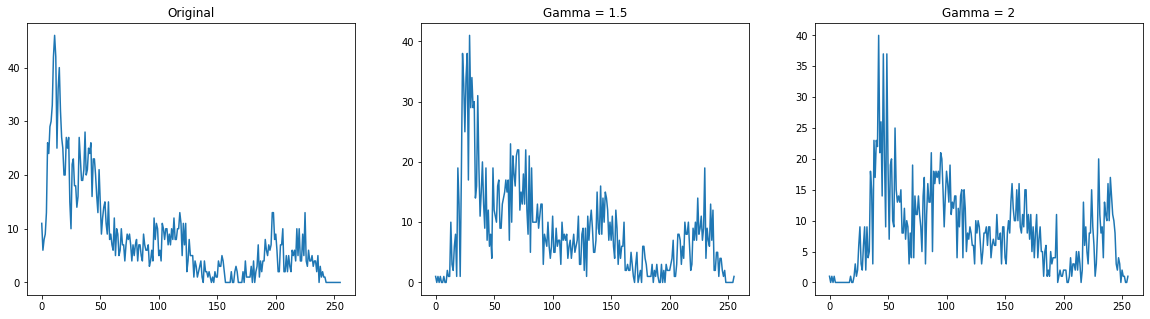

In [9]:
#Q3
def gammaCorrection(img,gamma): #gamma correction only to the L plane
    temp_img = img.copy()
    invGamma = 1/gamma
    for i in range (len(img)):
        for j in range (len(img[0])):
            temp_img[i][j][0] = ((img[i][j][0] / 255) ** invGamma) * 255
    return temp_img

img = cv.imread('highlights_and_shadows.jpg').astype(np.uint8)
assert img is not None, "Image Not Found!!"

gamma_1 = 1.5
gamma_2 = 2

img_RGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_Lab = cv.cvtColor(img,cv.COLOR_BGR2Lab)

img_corrected_1 = gammaCorrection(img_Lab,gamma_1)
img_corrected_2 = gammaCorrection(img_Lab,gamma_2)

img_corrected_RGB_1 = cv.cvtColor(img_corrected_1,cv.COLOR_LAB2RGB)
img_corrected_RGB_2 = cv.cvtColor(img_corrected_2,cv.COLOR_LAB2RGB)

fig,ax = plt.subplots(1,3,figsize = [20,8])

ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[0].axes.xaxis.set_visible(False)
ax[0].axes.yaxis.set_visible(False)


ax[1].imshow(img_corrected_RGB_1)
ax[1].axes.xaxis.set_visible(False)
ax[1].axes.yaxis.set_visible(False)

ax[2].imshow(img_corrected_RGB_2)
ax[2].axes.xaxis.set_visible(False)
ax[2].axes.yaxis.set_visible(False)

ax[0].set_title('Original')
ax[1].set_title('Gamma = {}'.format(gamma_1))
ax[2].set_title('Gamma = {}'.format(gamma_2))
plt.show()

hist_original = cv.calcHist(cv.cvtColor(img_RGB,cv.COLOR_BGR2RGB),[0],None,[256],[0,256])
hist_corrected_1 = cv.calcHist(img_corrected_RGB_1,[0],None,[256],[0,256])
hist_corrected_2 = cv.calcHist(img_corrected_RGB_2,[0],None,[256],[0,256])

fig,ax = plt.subplots(1,3,figsize = [20,5])

ax[0].plot(hist_original)
ax[1].plot(hist_corrected_1)
ax[2].plot(hist_corrected_2)

ax[0].set_title('Original')
ax[1].set_title('Gamma = {}'.format(gamma_1))
ax[2].set_title('Gamma = {}'.format(gamma_2))

# plt.legend(loc=1, prop={'size': 10})
plt.show()

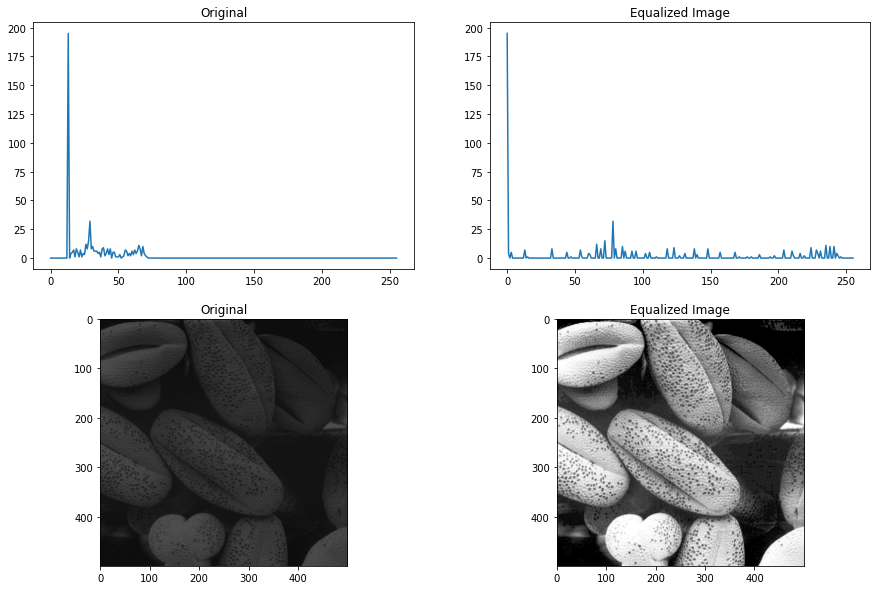

In [28]:
#Q4
img = cv.imread('shells.png',cv.IMREAD_GRAYSCALE).astype(np.uint8)
assert img is not None, "Image Not Found!!"

eq_img = cv.equalizeHist(img)

hist_original = cv.calcHist(img,[0],None,[256],[0,256])
hist_corrected_1 = cv.calcHist(eq_img,[0],None,[256],[0,256])
# hist_corrected_2 = cv.calcHist(img_corrected_RGB_2,[0],None,[256],[0,256])

fig,ax = plt.subplots(2,2,figsize = [15,10])

ax[0][0].plot(hist_original)
ax[0][1].plot(hist_corrected_1)
ax[1][0].imshow(img,cmap = 'gray',vmin =0,vmax =255)
ax[1][1].imshow(eq_img,cmap = 'gray',vmin =0,vmax =255)

ax[0][0].set_title('Original')
ax[0][1].set_title('Equalized Image')
ax[1][0].set_title('Original')
ax[1][1].set_title('Equalized Image')

plt.show()

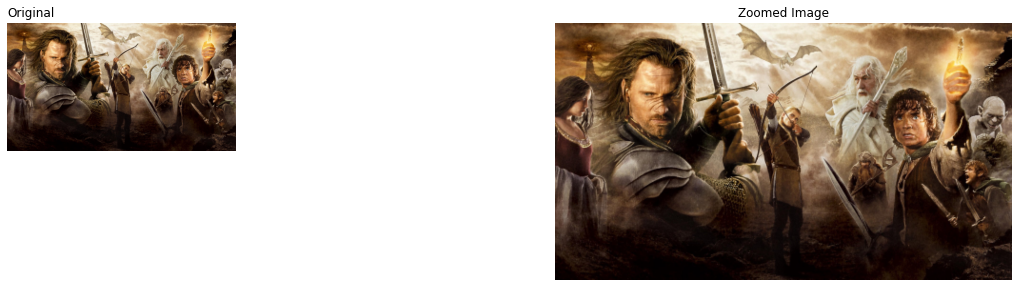

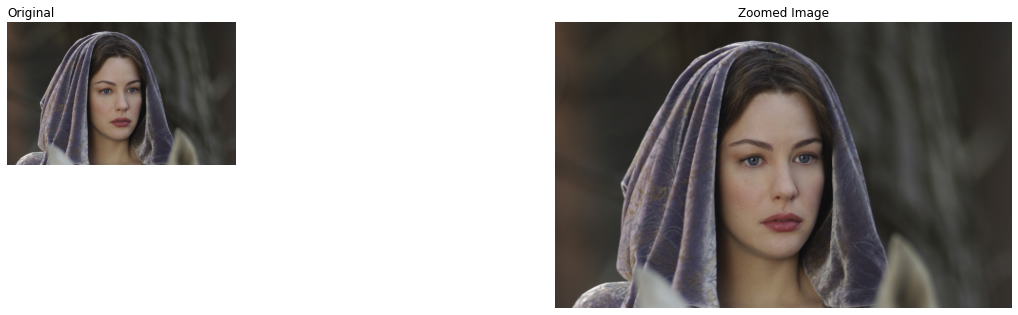

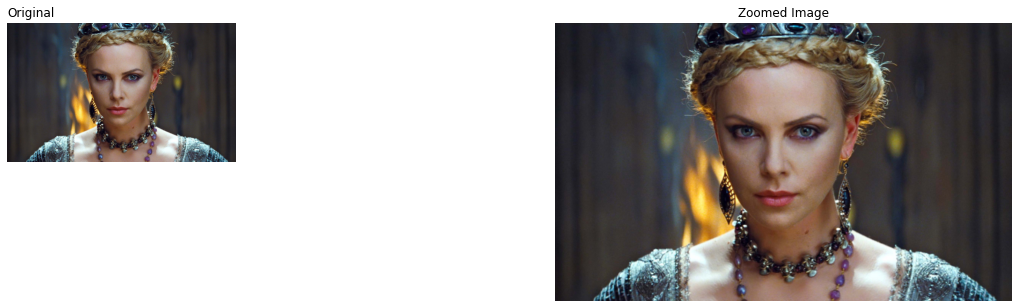

In [1]:
#Q5 - zoom images using nearest-neighbor method
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

def convertIndex(i,j,scale):
    x = int(i/scale)
    y = int(j/scale)
    return x,y

def zoomImg(img,scale):
    rows = int(img.shape[0]*scale)
    columns = int(img.shape[1]*scale)

    new_img = np.zeros((rows,columns,3),img.dtype)

    for i in range(rows):
        for j in range(columns):
            x,y = convertIndex(i,j,scale)
            new_img[i][j] = img[x][y]
    
    return new_img

def displayImages(image):
    img = cv.imread(image)
    assert img is not None, "Image Not Found!!"

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    zoomed_img = zoomImg(img,2)

    fig,ax = plt.subplots(1,2,figsize =[18, 6],sharey=True,sharex=True)

    ax[0].imshow(img)
    ax[1].imshow(zoomed_img)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[0].set_title('Original',loc='left')
    ax[1].set_title('Zoomed Image')

displayImages('a1q5images/im01small.png')
displayImages('a1q5images/im02small.png')
displayImages('a1q5images/im03small.png')

plt.show()

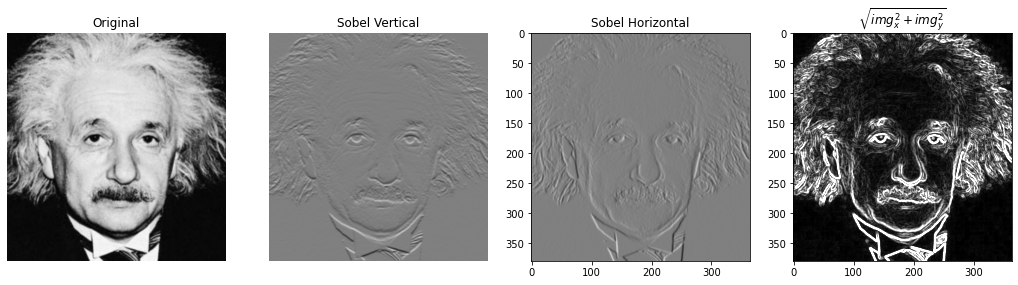

In [15]:
#Q6 - part A
img = cv.imread('einstein.png',cv.IMREAD_GRAYSCALE).astype('float32')
assert img is not None, "Image Not Found!!"

sobel_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float32)

img_x = cv.filter2D(img,-1,sobel_v)
img_y = cv.filter2D(img,-1,sobel_h)

grad_mag = np.sqrt(img_x**2 +img_y**2)


fig,ax = plt.subplots(1,4,figsize=(18,6))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(img_x,cmap='gray',vmin=-1020,vmax=1020)
ax[2].imshow(img_y,cmap='gray',vmin=-1020,vmax=1020)
ax[3].imshow(grad_mag,cmap='gray',vmin=0,vmax=255)

ax[0].axis('off')
ax[1].axis('off')

ax[0].set_title("Original")
ax[1].set_title("Sobel Vertical")
ax[2].set_title("Sobel Horizontal")
ax[3].set_title("$\sqrt{img_x^2 + img_y^2}$")

plt.show()

a:  1 b:  3


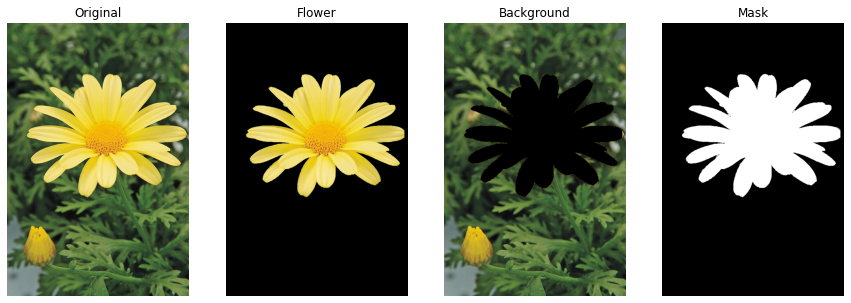

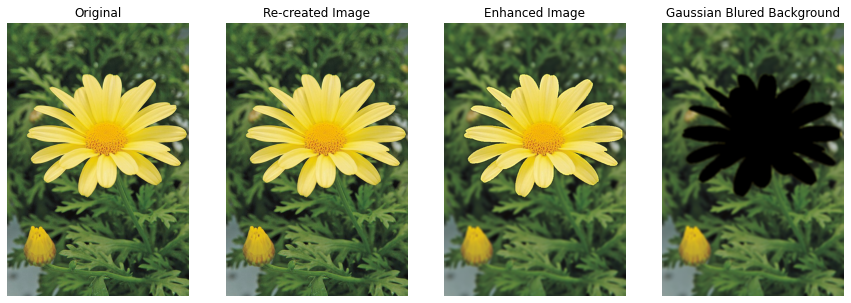

In [31]:
#Q7
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img = cv.imread('daisy.jpg')
assert img is not None, "Image Not Found!!"

img_RGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)

mask = np.zeros(img_RGB.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,500,500)

(mask, bgdModel, fgdModel) = cv.grabCut(img_RGB,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==cv.GC_BGD)|(mask==cv.GC_PR_BGD),0,1).astype('uint8')
fmask = (mask == cv.GC_PR_FGD).astype("uint8") * 255
flower = img_RGB*mask2[:,:,np.newaxis]

print("a: ",cv.GC_FGD,"b: ",cv.GC_PR_FGD)
bmask = (mask == cv.GC_PR_BGD).astype("uint8") * 255
outMask = (np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 0, 1)*255).astype(np.uint8)
background = cv.bitwise_and(img, img, mask=outMask) # Background Image

fig,ax = plt.subplots(1,4,figsize=(15,6))
ax[0].imshow(img_RGB)
ax[1].imshow(flower)
ax[2].imshow(cv.cvtColor(background,cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(fmask,cv.COLOR_BGR2RGB))

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')

ax[0].set_title("Original")
ax[1].set_title("Flower")
ax[2].set_title("Background")
ax[3].set_title("Mask")

background_blur =cv.GaussianBlur(background, (9,9), 4)
re_created = cv.add(cv.cvtColor(flower,cv.COLOR_RGB2BGR), background)
enhanced = cv.add(cv.cvtColor(flower,cv.COLOR_RGB2BGR), background_blur)

fig,ax = plt.subplots(1,4,figsize=(15,7))

ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(re_created,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(enhanced,cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(background_blur,cv.COLOR_BGR2RGB))

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')

ax[0].set_title("Original")
ax[1].set_title("Re-created Image")
ax[2].set_title("Enhanced Image")
ax[3].set_title("Gaussian Blured Background")

plt.show()

Q7) - c) When we are going to enhance the image, we blured the background using gaussianBlur with a 9,9 kernal. Because of that the rough edges of the flower shape are smoothened. Therefore, background just beyond the edge of the being flower quite dark in the enhanced image. We can clearly see the effect in the above pictures.